# Regressor de Sentimiento en ESP v1

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

import os, sys
jiazz = os.path.abspath(os.path.join('..'))
print(jiazz)
if jiazz not in sys.path:
    sys.path.append(jiazz)
sys.path

/app


['',
 '/usr/local/lib/python36.zip',
 '/usr/local/lib/python3.6',
 '/usr/local/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/site-packages/IPython/extensions',
 '/root/.ipython',
 '/app']

In [2]:
from wordcloud import WordCloud, STOPWORDS

def generate_cloudword(pd, image_dims=(800, 400)):
    mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 
    W, H = image_dims
    stopwords = set(STOPWORDS)
    data = pd

    wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=250,
      max_font_size=40,
      width=W, height=H,
      random_state=777
     ).generate(str(data['sample_value']))

    fig = plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

### Create Load Function

In [3]:
from pandas import read_csv, DataFrame
from sklearn.utils import shuffle
from slugify import slugify


def load(filename):
    df = read_csv('../data/%s.csv' % filename)
    return shuffle(df)

In [4]:
df = load('trainer_datasets_samples_aws')
df.head()



sample_value sample_tag_gender  \
621             @danielurresti1 chess descansa en paz.                 m   
466  @manuelvelarded ojala no llegue a la alcaldía ...                 m   
217   estimados los invito a votar en esta encuesta...                 m   
26   @eltiburon_ready @renzo_reggiardo @mario_hart ...                 f   
24   @danielurresti1 @salitasin todo será favorable...                 m   

     sample_float_intvoto sample_tag_emotion sample_tag_narrativa  \
621                   0.0                sad              opinion   
466                  -0.2                mad              opinion   
217                   0.8            neutral           comentario   
26                   -0.9                sad              opinion   
24                    0.9            neutral              opinion   

     sample_float_sentiment  sample_float_sarcasmo sample_tag_age  \
621                     0.2                    0.0          mas25   
466                     0.2                   -0.5          mas25   
217                     0.7                   -0.7        menos25   
26                     -0.9                   -0.9          mas25   
24                      0.8                    0.9        menos25   

    sample_tag_topic  
621         politics  
466         politics  
217         politics  
26          politics  
24          politics

## Tokenize Words

In [5]:
from core import Jiazz as J

df_samples = df[['sample_value', 'sample_float_sarcasmo']]
df_samples['sample_value'] = df_samples['sample_value'].apply(lambda x: J.stemmer(x))
df_samples

sample_value  sample_float_sarcasmo
621                                   ches descans paz                    0.0
466                   ojal leg alcaldi lim recuerd vil                   -0.5
217  estim invit vot encuest mejor opcion alcaldi l...                   -0.7
26   regiard mal decision podri lime farandul mafi ...                   -0.9
24   favor tio uresti esper bien calabazit karl cal...                    0.9
365                     propuest realment quier alcald                    0.0
286  actitud gol met canch bien dich cuid defens ma...                   -0.1
555                                  seor intimid nadi                    0.0
8               escrit fuerz primer mejor candidat lim                   -0.6
515                             alan garci versus pati                    0.4
492     crer hij comunicor lider encuest aprend peruan                    0.2
246     nadi quit libert deber suvension diner impuest                   -0.4
68                               postul regidor planch                   -0.8
109  regiard sepult polit ojal chamb combat salg el...                    0.4
396                                       busc remplaz                    0.7
438    buen tio uresti apoy esper pis min antipersonal                    0.4
454  rafael sant alcald puebl libr regul mal especi...                    0.0
161         lid renz regiard presentacion plan gobiern                    1.0
99        ingenieri transit trabaj verdader inteligent                   -0.9
279  tio vot aregl transit bus camion combis demasi...                   -0.6
241  patet uresti todavi eleg alcald air alcald lam...                   -1.0
354                              lev pas selfi car nuc                    0.5
387  pon semafor final polici ocasion trafic sab ev...                   -0.9
604  convoqu comit concurs premi desarol mejor star...                    0.0
289  smiling segur elos afect simulacr smiling cham...                    0.5
97   tar uresti acus viol humild campesin audienci ...                   -1.0
189                       present candidat alcaldi lim                   -0.7
168                                   candidat provien                    0.3
625                                 gust alert tempran                    0.3
21      cruz desinform denunci indic cal corupcion pis                   -0.8
..                                                 ...                    ...
652  igual javi prad colect informal cuadr mal serv...                    0.0
522                                      pon fot panel                    0.1
579  gustari pregunt candidat alcald asesin violado...                    0.4
226                     graci marisol felic aniversari                   -0.7
602         general junt mejor jef f cier congres podr                   -0.1
74   primer combat insegur ciudadan sirv ciclovi la...                   -1.0
381             huel podr renz jod hart aprist fujimor                   -0.8
432              gustari president republ caract fuert                   -0.9
531         not lanzamient campa candidat renz regiard                    0.0
505             confi inocent acus perjudic candidatur                   -0.1
581                                                sab                    0.0
335  recuerd ex ministr jorg niet montesin habl pro...                    0.0
513                                  tigril alcald lim                   -0.5
408                            vam trafic av javi prad                   -0.7
202                                  smiling escoj mal                   -0.6
500  cas luy vincul laboral cornej sab piqu venc pr...                    0.2
638  manuel velard postul alcaldi lim siempr unid e...                    0.0
563             castaed punt smiling smiling urnas ver                    0.4
658  entrev cort bus selecion futbol informacion pr...                    0.0
144  tio uresti aregl problem inscripcion part gan ...          

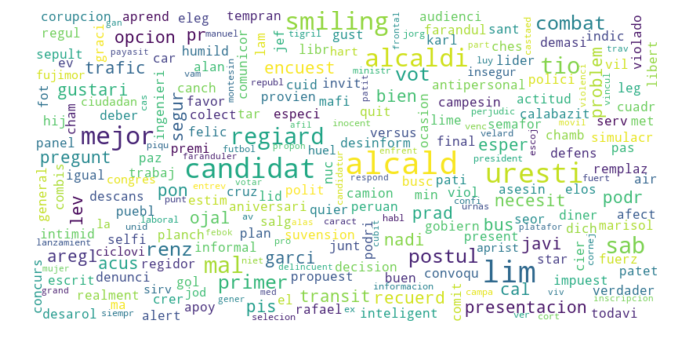

In [6]:
# df_pos = df[df['label'] == 'pos']
# df_neutral = df[df['label'] == 'neutral']
# df_neg = df[df['label'] == 'neg']

generate_cloudword(df_samples)
#generate_cloudword(df_neutral)
#generate_cloudword(df_neg)

### Split Training Dataset

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# df = shuffle(df)

X, y = df_samples['sample_value'], df_samples['sample_float_sarcasmo']

vect = TfidfVectorizer(use_idf=True, smooth_idf=False)

# classes = df.label.unique()
# print(classes)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.1,
                                                    random_state=777)

### Entrenamiento

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import numpy as np



alg = MultinomialNB()
alg = LinearSVC()
#alg = ElasticNet()
#alg = Perceptron(n_jobs=-1, class_weight='balanced')
#alg = LogisticRegression()
alg = LinearRegression(copy_X=True, fit_intercept=True)

pipe = Pipeline([('vec', vect), ("clf", alg)])
print('Run Logistic')

#{'clf__fit_intercept': True, 
# 'clf__normalize': True, 
# 'vec__analyzer': 'word',
# 'vec__binary': True, 'vec__max_df': 0.9, 'vec__ngram_range': (1, 2), 
#'vec__norm': 'l2', 'vec__smooth_idf': False, 'vec__use_idf': True}

param_grid = dict(
    #clf__C=[1, .5, 1e3],
    clf__fit_intercept=[True],
    clf__normalize=[True],
    #clf__gamma=[.1, .05],
    # clf__dual=[True],    
    
    #clf__n_estimators=[50],
    #clf__penalty=['l2'],
    # clf__alpha=[.1, .01],
    # clf__fit_prior=[False, True],
    
    vec__ngram_range=[(1, 2), (1, 3)],
    vec__analyzer=['word'],
    vec__max_df=[.9, .95],
    vec__norm=['l1'],
    vec__binary=[True, False],
    vec__use_idf=[True, False],
    vec__smooth_idf=[False, False]    
)

shuffle_kfold = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=shuffle_kfold, verbose=5, n_jobs=24, scoring='r2')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Run Logistic
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_

[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.2210046333737874, total=   0.4s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.20021485678423634, total=   0.5s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.4148296349744207, total=   0.5s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(

[Parallel(n_jobs=24)]: Done  24 tasks      | elapsed:    1.5s


[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.1697855266236048, total=   1.0s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.3124647961803313, total=   1.0s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.95, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.3489646786527978, total=   0.5s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.95, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.4148296349744207, total=   0.5s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__bina

[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.0336612521619748, total=   0.9s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.95, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.35854893111334607, total=   0.7s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.95, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf

[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.379066694304671, total=   0.9s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.2673952574272531, total=   0.1s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.050301375364865786, total=   0.8s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.95, vec__ngram_r

[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.21912695847956076, total=   0.6s
[CV]  clf__fit_in

[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.21361728670067737, total=   0.9s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.24882699578076806, total=   0.9s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth

[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.13195898969793984, total=   1.0s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 2), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.31

[Parallel(n_jobs=24)]: Done 146 out of 160 | elapsed:    5.9s remaining:    0.6s


[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.21361728670067737, total=   0.8s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.2804517646361435, total=   0.6s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=True, score=-0.05597890948918538, total=   0.8s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.95, vec__ngram_range=(1, 3), vec__norm=l1, vec__smooth_idf=False, vec__use_idf=False, score=-0.13195898969793984, total=   0.4s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word,

[Parallel(n_jobs=24)]: Done 160 out of 160 | elapsed:    6.2s finished


## Generate Binary Model

In [13]:
from core import Jiazz as J


J.compress(grid_search, 'sarcasmo_esp_float')

'sarcasmo_esp_float'

### Test Binary Model

In [18]:
from core import Jiazz as J


alg = J.load('sarcasmo_esp_float')

text = "si seras alcalde, pero de tu casa"
J.score(alg, text)

{'tag': -0.06001855905350287, 'scores': {}}

In [12]:
# =IF(B2<0,RANDBETWEEN(-99, -65)/100,IF(B2=0,RANDBETWEEN(0, 15)/100,IF(B2>0,RANDBETWEEN(65, 99)/100,1)))